## Preprocessing Data

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels =  []
train_samples = []

Example data:
- An experiemental drug was tested on individuals from ages 13 to 100.
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
#print raw data
for i in train_samples:
    print(i)

In [ ]:
for i in train_labels:
    print(i)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [ ]:
#print scaled data
for i in scaled_train_samples:
    print(i)

## Simple Sequential Model


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
model = Sequential([
    Dense(units= 16, input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [9]:
# Get the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(scaled_train_samples,train_labels,validation_split=0.1,batch_size=10,epochs=20,verbose=2)

Epoch 1/20
189/189 - 1s - loss: 0.6239 - accuracy: 0.7164 - val_loss: 0.4909 - val_accuracy: 0.9714 - 1s/epoch - 5ms/step
Epoch 2/20
189/189 - 0s - loss: 0.4268 - accuracy: 0.8810 - val_loss: 0.2534 - val_accuracy: 0.9810 - 215ms/epoch - 1ms/step
Epoch 3/20
189/189 - 0s - loss: 0.3210 - accuracy: 0.9175 - val_loss: 0.1765 - val_accuracy: 0.9952 - 223ms/epoch - 1ms/step
Epoch 4/20
189/189 - 0s - loss: 0.2923 - accuracy: 0.9312 - val_loss: 0.1371 - val_accuracy: 0.9810 - 209ms/epoch - 1ms/step
Epoch 5/20
189/189 - 0s - loss: 0.2809 - accuracy: 0.9312 - val_loss: 0.1277 - val_accuracy: 1.0000 - 210ms/epoch - 1ms/step
Epoch 6/20
189/189 - 0s - loss: 0.2752 - accuracy: 0.9360 - val_loss: 0.1198 - val_accuracy: 1.0000 - 204ms/epoch - 1ms/step
Epoch 7/20
189/189 - 0s - loss: 0.2695 - accuracy: 0.9397 - val_loss: 0.1207 - val_accuracy: 0.9857 - 217ms/epoch - 1ms/step
Epoch 8/20
189/189 - 0s - loss: 0.2662 - accuracy: 0.9402 - val_loss: 0.1132 - val_accuracy: 1.0000 - 211ms/epoch - 1ms/step
Epo

# Save and Load Model

## 1. model.save()

In [ ]:
model.save('medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [ ]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [ ]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[-0.55824059, -0.23213108, -0.23506787, -0.18476903, -0.02869798,
          0.22048838, -0.24348828, -0.20775913, -0.04001847,  0.52669042,
         -0.57981801,  0.35746267, -0.17660122, -0.22007732,  0.69854277,
          0.52346867]], dtype=float32),
 array([ -5.05928067e-04,   1.90466806e-01,  -5.11594524e-04,
         -5.11574442e-04,   1.53560624e-01,   2.13311628e-01,
          1.95102409e-01,  -1.62209501e-04,  -5.11592429e-04,
         -6.52560219e-02,  -5.11568855e-04,  -2.15423163e-02,
          1.51852086e-01,  -5.11587015e-04,  -8.08358714e-02,
          1.78475305e-01], dtype=float32),
 array([[-0.00450879, -0.08100165,  0.11644009,  0.13092437, -0.28577736,
          0.08238146, -0.21489237,  0.19505553, -0.10658678, -0.27693301,
         -0.24013698, -0.30782962,  0.26164085, -0.32277834,  0.32263884,
          0.06146641, -0.06125453, -0.32100996,  0.09845912,  0.08729291,
         -0.34265009, -0.18574393, -0.26289314, -0.08126694, -0.11828163,
         -0.105

In [ ]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [ ]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [ ]:
json_string

'{"backend": "theano", "keras_version": "2.0.6", "config": [{"config": {"use_bias": true, "dtype": "float32", "kernel_regularizer": null, "bias_regularizer": null, "activation": "relu", "batch_input_shape": [null, 1], "kernel_initializer": {"config": {"mode": "fan_avg", "seed": null, "scale": 1.0, "distribution": "uniform"}, "class_name": "VarianceScaling"}, "trainable": true, "bias_constraint": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "activity_regularizer": null, "kernel_constraint": null, "units": 16, "name": "dense_7"}, "class_name": "Dense"}, {"config": {"use_bias": true, "kernel_regularizer": null, "bias_regularizer": null, "activation": "relu", "kernel_initializer": {"config": {"mode": "fan_avg", "seed": null, "scale": 1.0, "distribution": "uniform"}, "class_name": "VarianceScaling"}, "trainable": true, "bias_constraint": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "activity_regularizer": null, "name": "dense_8", "units": 32, "kernel_

In [ ]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [ ]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [ ]:
model.save_weights('my_model_weights.h5')

In [ ]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model2.load_weights('my_model_weights.h5')

## Preprocess Test Data

In [17]:
test_labels =  []
test_samples = []

In [18]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [19]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [20]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [21]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
    print(i)

[ 0.7410683  0.2589317]
[ 0.14958295  0.85041702]
[ 0.96918124  0.03081879]
[ 0.12985019  0.87014979]
[ 0.88596725  0.11403273]
[ 0.27972952  0.72027051]
[ 0.97202832  0.02797166]
[ 0.13397652  0.86602348]
[ 0.96605438  0.03394562]
[ 0.11411262  0.88588738]
[ 0.97461933  0.02538065]
[ 0.11597294  0.88402706]
[ 0.53810829  0.46189171]
[ 0.11046991  0.88953006]
[ 0.92053664  0.07946334]
[ 0.41420627  0.58579373]
[ 0.53810829  0.46189171]
[ 0.09690166  0.90309834]
[ 0.94527358  0.05472645]
[ 0.11227837  0.88772166]
[ 0.97461933  0.02538065]
[ 0.41420627  0.58579373]
[ 0.98343712  0.01656286]
[ 0.22349688  0.77650309]
[ 0.97874761  0.02125239]
[ 0.11227837  0.88772166]
[ 0.98343712  0.01656286]
[ 0.10692947  0.89307052]
[ 0.95885855  0.04114145]
[ 0.12674139  0.87325859]
[ 0.51321256  0.48678744]
[ 0.10180613  0.8981939 ]
[ 0.96605438  0.03394562]
[ 0.30028591  0.69971412]
[ 0.98595065  0.01404935]
[ 0.10868704  0.89131296]
[ 0.48825112  0.51174885]
[ 0.22349688  0.77650309]
[ 0.89567453  

In [26]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)
rounded_predictions = np.argmax(predictions, axis=1)

In [27]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Confusion Matrix

In [28]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [29]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


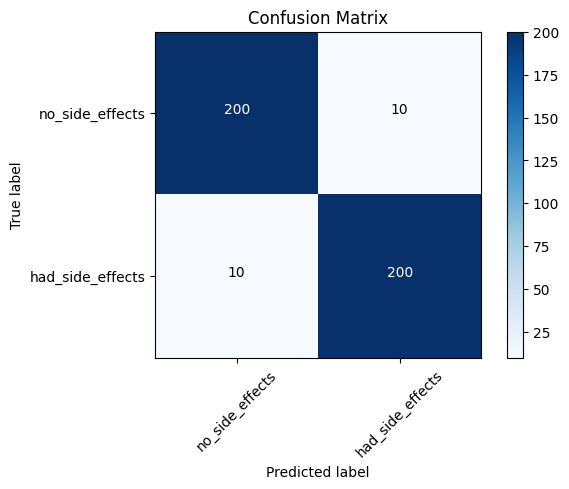

In [31]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')